<a href="https://colab.research.google.com/github/pd4ni3l/IA2/blob/master/Incendio_florestal_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#LISTAR ARQUIVOS NA PASTA CORRENTE
from __future__ import print_function
import os,sys
path = '.'
# path = '../../../IA_REDES_NEURAIS/ML/elevador'
# path = '../../../../Downloads'
 
if len(sys.argv) == 2:
    path = sys.argv[1]
 
 
files = os.listdir(path)
for name in files:
    print(name)

.config
forestfires.csv
sample_data


In [0]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from time import process_time

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

Base dados: https://archive.ics.uci.edu/ml/datasets/forest+fires 
Abstract: This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data. (http://www3.dsi.uminho.pt/pcortez/forestfires/)

Resumo: Esta é uma tarefa de regressão difícil, onde o objetivo é prever a área queimada de incêndios florestais, na região nordeste de Portugal, usando dados meteorológicos e outros dados. (http://www3.dsi.uminho.pt/pcortez/forestfires/)

In [52]:
file_name = 'forestfires.csv'
data = pd.read_csv(file_name, sep=',')
#data = pd.read_csv(file_name, sep=',', usecols=['FFMC','DMC',
#                                              'DC','ISI','temp',
#                                             'RH','wind','rain'])
data.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


X - coordenada espacial do eixo x no mapa do parque de Montesinho: 1 a 9<br>
Y - coordenada espacial do eixo y no mapa do parque de Montesinho: 1 a 9<br>
month - mês do ano: 'jan' a 'dec'<br>
day - dia da semana: 'mon' to 'sun'<br>
FFMC - Índice FFMC do sistema FWI (Canadian Forest Fire Weather Index): 18,7 a 96,20<br>
DMC - Índice DMC do sistema FWI: 1.1 a 291.3<br>
DC - Índice DC do sistema FWI: 7,9 a 860,6<br>
ISI - Índice ISI do sistema FWI: 0.0 a 56.10<br>
temp - temperatura em graus Celsius, 2,2-33,30<br>
RH - umidade relativa em%: 15,0 a 100<br>
wind - velocidade do vento em km / h: 0.40 a 9.40<br>
rain - chuva externa em mm / m2: 0.0 a 6.4<br>
área - a área queimada da floresta (em ha): 0.00 a 1090.84

In [53]:
data.shape

(517, 13)

In [54]:
data['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
may      2
jan      2
nov      1
Name: month, dtype: int64

In [55]:
# Convertendo meses alfanuméricos em numéricos
# criando um dicionário dic  
mes = {'jan': 1,'feb': 2, 'mar':3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 
       'oct': 10, 'nov': 11, 'dec': 12} 
#print(data.month)
data.month = [mes[item] for item in data.month] 
data.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,8,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,8,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,8,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,9,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,9,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [56]:
#verificando a alteração dos meses
data['month'].value_counts()

8     184
9     172
3      54
7      32
2      20
6      17
10     15
12      9
4       9
5       2
1       2
11      1
Name: month, dtype: int64

In [57]:
data['day'].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [58]:
# Convertendo dias alfanuméricos em numéricos
# criando um dicionário dic  
dia = {'sun': 1, 'mon': 2, 'tue': 3, 'thu': 4, 'wed': 5, 'fri': 6, 'sat': 7} 
#print(data.month)
data.day = [dia[item] for item in data.day] 
data.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,8,1,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,8,2,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,8,2,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,9,3,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,9,7,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [59]:
#verificando os dias convertidos
data['day'].value_counts()

1    95
6    85
7    84
2    74
3    64
4    61
5    54
Name: day, dtype: int64

In [0]:
#data['area'].value_counts()

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null int64
day      517 non-null int64
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(5)
memory usage: 52.6 KB


In [0]:
#Transformação da área incendiada para 0 - sem incêndio, 1 - com incêndio
data['incendio'] = data['area'].apply(lambda x: 1 if x > 0.00 else 0.00)

#df['equal_or_lower_than_4?'] = df['set_of_numbers'].apply(lambda x: 'True' if x <= 4 else 'False')

In [63]:
data['incendio'].value_counts()

1.0    270
0.0    247
Name: incendio, dtype: int64

In [64]:
# dataset final com dados convertidos
data.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,incendio
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0
5,8,6,8,1,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,0.0
6,8,6,8,2,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,0.0
7,8,6,8,2,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0,0.0
8,8,6,9,3,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0,0.0
9,7,5,9,7,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0,0.0


A partir deste ponto será utilizado como base o arquivo fornecido pela Professora Letícia (pca_mnist_mlp_svm_NEW.py) com as necessárias alterações. 


In [0]:
# PCA 
#normalização
#transforma uma lista em um vetor
X_ = np.array(data)
m = np.mean(X_)
s = np.std(X_,ddof=1)
X = (X_ - m)/s

In [66]:
print(X_)

[[ 7.    5.    3.   ...  0.    0.    0.  ]
 [ 7.    4.   10.   ...  0.    0.    0.  ]
 [ 7.    4.   10.   ...  0.    0.    0.  ]
 ...
 [ 7.    4.    8.   ...  0.   11.16  1.  ]
 [ 1.    4.    8.   ...  0.    0.    0.  ]
 [ 6.    3.   11.   ...  0.    0.    0.  ]]


In [67]:
#Calcular PCA de todo o conjunto de entrada
pca = PCA(n_components=14)
X_projected = pca.fit_transform(X)

print('Shape dados brutos: ' + str(X.shape))
print('Shape dados PCA: ' + str(X_projected.shape))

Shape dados brutos: (517, 14)
Shape dados PCA: (517, 14)


In [68]:
print(pca)

PCA(copy=True, iterated_power='auto', n_components=14, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


In [69]:
print(X_projected)

[[ 2.96029564e+00 -4.31920471e-02 -7.48558410e-03 ... -4.85848322e-03
   2.73670357e-03  1.77159172e-05]
 [-6.76137783e-01 -1.38377392e-01 -6.09999675e-01 ...  8.30178757e-03
   3.45131902e-03  4.12987996e-04]
 [-7.97662637e-01 -1.37701849e-01 -5.78585303e-01 ...  7.48057002e-03
   3.34104049e-03  6.99425519e-04]
 ...
 [-6.78550801e-01 -6.05937776e-02 -4.65507054e-01 ... -6.27622158e-05
  -2.46785851e-03 -1.27419740e-03]
 [-4.61026990e-01 -7.65501797e-02  1.51428311e-01 ... -2.31138633e-03
   3.32613301e-03 -3.26290952e-04]
 [ 2.90824137e+00 -5.41939717e-02 -1.76318096e-01 ...  3.54006528e-02
   4.33262926e-03  6.71990438e-04]]


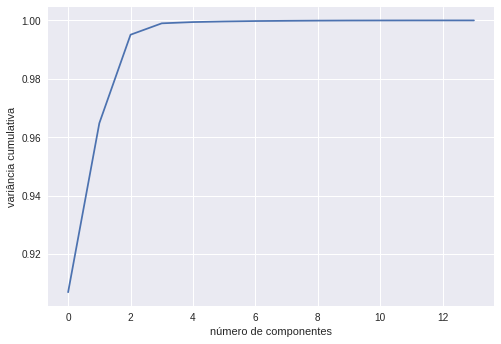

In [70]:
#Verificando o número de componentes
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('número de componentes')
plt.ylabel('variância cumulativa')
plt.show()

In [0]:
# Set a KMeans clustering
kmeans = KMeans(n_clusters=10)
# Compute cluster centers and predict cluster indices
y = kmeans.fit_predict(X_projected)

In [0]:
#print(y)

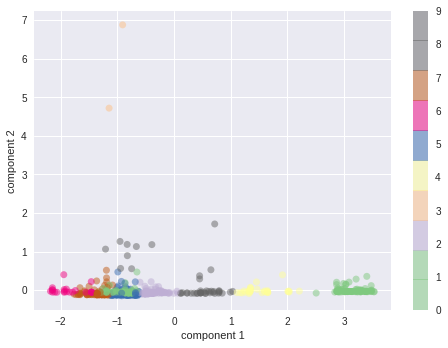

In [73]:
# plot em 2D com 2 componentes
plt.scatter(X_projected[:, 0], X_projected[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

In [0]:
# Separa conjunto de train e val dos dados brutos
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)

In [0]:
# Separa conjunto de train e val da PCA
projected_train, projected_val, y_train, y_val = train_test_split(X_projected, y, test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)

In [0]:
# Definir arquitetura MLP
mlp = MLPClassifier(hidden_layer_sizes=(200,200), activation='relu', max_iter=1000, alpha=1e-4,
                     solver='lbfgs', verbose=10, tol=1e-3, random_state=1, learning_rate_init=.01)

#mlp = MLPClassifier(hidden_layer_sizes=(200,), activation='relu', max_iter=1000, alpha=1e-4,
#                     solver='sgd', verbose=10, tol=1e-3, random_state=1, learning_rate_init=.01)

In [77]:
# Aqui fazer um treinamento e uma validacao da MLP com dados brutos
start = process_time()
mlp.fit(X_train, y_train)
end = process_time()
time_mlp = end - start
print('Tempo de treinamento_mlp_dados_brutos: ' + str(time_mlp))
print('Erro no final do treinamento_mlp_dados_brutos: %f' % mlp.loss_)

Tempo de treinamento_mlp_dados_brutos: 9.776135265999999
Erro no final do treinamento_mlp_dados_brutos: 0.000389


In [78]:
# Métricas da validação MLP com dados brutos
preds_val = mlp.predict(X_val)
#print(preds_val)
#print(y_val)

correct_outputs_val = y_val
n_acertos_val = 0
for u in range(0, len(correct_outputs_val)):
   if preds_val[u] == correct_outputs_val[u]:
       n_acertos_val += 1
print('Número de acertos_val_mlp com dados brutos: ' + str((n_acertos_val*100)/len(correct_outputs_val)))
print(confusion_matrix(y_val,preds_val))
print(classification_report(y_val,preds_val))

Número de acertos_val_mlp com dados brutos: 98.07692307692308
[[16  0  1  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  2]
 [ 0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  9  0  0  0  0  0]
 [ 0  0  0  0  0 35  0  0  0  0]
 [ 0  0  0  0  0  0  7  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0]
 [ 0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  0 10]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       1.00      1.00      1.00        27
           2       0.95      0.91      0.93        22
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        35
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00        25
           8       1.00      1.00      1.00         3
           9       0.83      1.00      0.91        10

   micro av

In [79]:
# Aqui fazer um treinamento e uma validacao da MLP com PCA
start = process_time()
mlp.fit(projected_train, y_train)
end = process_time()
time_mlp = end - start
print('Tempo de treinamento_mlp_pca: ' + str(time_mlp))
print("Erro no final do treinamento_mlp_pca: %f" % mlp.loss_)


Tempo de treinamento_mlp_pca: 1.7713044889999985
Erro no final do treinamento_mlp_pca: 0.000317


In [80]:
# Métricas da validação MLP com PCA
preds_val = mlp.predict(projected_val)

correct_outputs_val = y_val
n_acertos_val = 0
for u in range(0, len(correct_outputs_val)):
   if preds_val[u] == correct_outputs_val[u]:
       n_acertos_val += 1
print('Número de acertos_val_mlp com PCA: ' + str((n_acertos_val*100)/len(correct_outputs_val)))
print(confusion_matrix(y_val,preds_val))
print(classification_report(y_val,preds_val))


Número de acertos_val_mlp com PCA: 98.71794871794872
[[16  0  1  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  1]
 [ 0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  9  0  0  0  0  0]
 [ 0  0  0  0  0 35  0  0  0  0]
 [ 0  0  0  0  0  0  7  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0]
 [ 0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  0 10]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       1.00      1.00      1.00        27
           2       0.95      0.95      0.95        22
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        35
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00        25
           8       1.00      1.00      1.00         3
           9       0.91      1.00      0.95        10

   micro avg       0

In [0]:
## definir arquitetura da SVM
svm = svm.SVC(kernel='rbf',C =1, gamma='auto')

In [82]:
# Aqui fazer um treinamento e uma validacao da SVM com dados brutos
start = process_time()
svm.fit(X_train, y_train)
end = process_time()
time_svm = end - start
print('Tempo de treinamento_svm_dados_brutos: ' + str(time_svm))

Tempo de treinamento_svm_dados_brutos: 0.019506625999998306


In [83]:
# Métricas da validação SVM com dados brutos
preds_val_svm= svm.predict(X_val)

correct_outputs_val_svm = y_val
n_acertos_val_svm = 0
for u in range(0, len(correct_outputs_val_svm)):
   if preds_val_svm[u] == correct_outputs_val_svm[u]:
            n_acertos_val_svm += 1
print('Number of acertos_val_svm_dados brutos: ' + str((n_acertos_val_svm*100)/len(correct_outputs_val_svm)))
print(confusion_matrix(y_val,preds_val_svm))

Number of acertos_val_svm_dados brutos: 85.8974358974359
[[13  0  1  0  0  3  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  0  0]
 [ 0  0 18  0  0  4  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  9  0  0  0  0  0]
 [ 0  0  0  0  0 35  0  0  0  0]
 [ 2  0  0  0  0  0  5  0  0  0]
 [ 0  0  0  0  0  8  0 17  0  0]
 [ 0  0  0  0  0  3  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  9]]


In [84]:
# Aqui fazer um treinamento e uma validacao da svm com PCA
start = process_time()
svm.fit(projected_train, y_train)
end = process_time()
time_svm = end - start
print('Tempo de treinamento_svm_pca: ' + str(time_svm))

Tempo de treinamento_svm_pca: 0.011287196000001387


In [85]:
# Métricas da validação SVM com PCA
preds_val_svm= svm.predict(projected_val)

correct_outputs_val_svm = y_val
n_acertos_val_svm = 0
for u in range(0, len(correct_outputs_val_svm)):
   if preds_val_svm[u] == correct_outputs_val_svm[u]:
            n_acertos_val_svm += 1
print('Número de acertos_val_svm PCA: ' + str((n_acertos_val_svm*100)/len(correct_outputs_val_svm)))
print(confusion_matrix(y_val,preds_val_svm))


Número de acertos_val_svm PCA: 85.8974358974359
[[13  0  1  0  0  3  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  0  0]
 [ 0  0 18  0  0  4  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  9  0  0  0  0  0]
 [ 0  0  0  0  0 35  0  0  0  0]
 [ 2  0  0  0  0  0  5  0  0  0]
 [ 0  0  0  0  0  8  0 17  0  0]
 [ 0  0  0  0  0  3  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  9]]


In [0]:
## testar um único exemplo
exemplo_=projected_val[1,]
exemplo = exemplo_.reshape((1, 14))
pred_svm = svm.predict(exemplo)
pred_mlp = mlp.predict(exemplo)

In [87]:
print('Exemplo: ', exemplo)
print('Predict SVM:', pred_svm)
print('Predict MLP', pred_mlp)

Exemplo:  [[-1.45475948e+00 -5.45174260e-02  6.38442352e-01  5.15963959e-02
   3.88403457e-02 -2.97136256e-02 -2.02774262e-03 -8.85043328e-03
   1.25114484e-03  6.10461174e-03 -9.98377155e-04 -9.54825879e-04
   2.90494191e-03  2.23733009e-05]]
Predict SVM: [0]
Predict MLP [6]
